# Modelo Random Forest

## Librerias a utilizar

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc

## Paso 1. Lectura del conjunto de datos procesado

In [80]:
X=pd.read_csv('../../Random_Forest/data/processed/X.csv')
y=pd.read_csv('../../Random_Forest/data/processed/y.csv')

In [81]:
X.shape

(1000, 6)

In [82]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.head()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age
29,5,117,0,34.100000,0.337000,38
535,4,132,0,32.900000,0.302000,23
695,7,142,480,30.400000,0.128000,43
557,8,110,0,27.800000,0.237000,58
836,4,122,0,32.020995,0.256373,35


## Paso 2: Inicialización y entrenamiento del modelo

In [153]:

model = RandomForestClassifier(max_depth=5, min_samples_split=10, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, min_samples_split=10, random_state=42)

## Paso 3: Predicción del modelo

In [154]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [155]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")
predicciones_exactas = accuracy_score(y_test, y_pred, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.795
El número de predicciones exactas es:  159.0


### Validación cruzada del modelo

In [156]:
# Realiza la validación cruzada con 5 folds
scores = cross_val_score(model, X_train, y_train, cv=10, scoring='accuracy')

# Imprime los resultados
print("Scores:", scores)
print("Mean score:", round(scores.mean(),4))
print("Standard deviation:", round(scores.std(),4))

Scores: [0.7625 0.7375 0.8625 0.8375 0.7625 0.825  0.7625 0.775  0.8    0.8125]
Mean score: 0.7938
Standard deviation: 0.038


In [157]:
params = model.get_params()
print(params)

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 10, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


## Paso 3: Optimización del Modelo

### RandomizedSearchCV

In [126]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [10, 50, 100, 200,300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15,20],
    'min_samples_split': np.random.randint(2,20,size=10),
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'warm_start':[True]    
}

# Crear un objeto RandomizedSearchCV
model_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=param_grid, cv=10, scoring='accuracy', n_iter=40, verbose=1)
model_rs.fit(X_train,y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=40,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 5, 10, 15, 20],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 5, 10],
                                        'min_samples_split': array([18,  2, 13,  9,  3, 18, 19,  9,  9,  4]),
                                        'n_estimators': [10, 50, 100, 200, 300],
                                        'warm_start': [True]},
                   scoring='accuracy', verbose=1)

In [127]:
print("Mejor puntuación:", model_rs.best_score_)
print("Mejores hiperparámetros:", model_rs.best_params_)

Mejor puntuación: 0.8087499999999999
Mejores hiperparámetros: {'warm_start': True, 'n_estimators': 50, 'min_samples_split': 13, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 5, 'criterion': 'gini'}


In [128]:
model_rs_final=RandomForestClassifier(n_estimators=50, warm_start= True, criterion='gini', max_depth=5, min_samples_split=13,
    min_samples_leaf=1, max_features='sqrt',random_state=42)
model_rs_final.fit(X_train, y_train)
    

RandomForestClassifier(max_depth=5, min_samples_split=13, n_estimators=50,
                       random_state=42, warm_start=True)

In [129]:
y_pred_rs = model_rs_final.predict(X_test)
y_pred_rs

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1], dtype=int64)

In [130]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_rs, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.785
El número de predicciones exactas es:  157.0


### GridSearchCV

In [143]:
# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 150],
    'criterion': ['entropy'],
    'max_depth': [5, 10, 12],
    'min_samples_split':[10,12,15],
    'min_samples_leaf': [1,2],
    'max_features': [3],
    'random_state': [42]
}
    
# Crear un objeto GridSearchCV
model_gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=1)

# Entrenar el modelo con los datos de entrenamiento
model_gs.fit(X_train, y_train)

Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'criterion': ['entropy'], 'max_depth': [5, 10, 12],
                         'max_features': [3], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [10, 12, 15],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             scoring='accuracy', verbose=1)

In [144]:
print("Mejor puntuación:", model_gs.best_score_)
print("Mejores hiperparámetros:", model_gs.best_params_)

Mejor puntuación: 0.8025
Mejores hiperparámetros: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 50, 'random_state': 42}


In [145]:
model_gs_final=RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=5, min_samples_split=10,
    min_samples_leaf=2, max_features=3,random_state=42)
model_gs_final.fit(X_train, y_train)
    

RandomForestClassifier(criterion='entropy', max_depth=5, max_features=3,
                       min_samples_leaf=2, min_samples_split=10,
                       n_estimators=50, random_state=42)

In [146]:
y_pred_gs = model_gs_final.predict(X_test)
y_pred_gs

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1], dtype=int64)

In [147]:
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_gs)}")
predicciones_exactas = accuracy_score(y_test, y_pred_gs, normalize=False)
print("El número de predicciones exactas es: ", predicciones_exactas) 

Accuracy Score: 0.78
El número de predicciones exactas es:  156.0


### Parámetros de desempeño del modelo

#### Curva Roc

In [158]:
y_pred_proba=model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

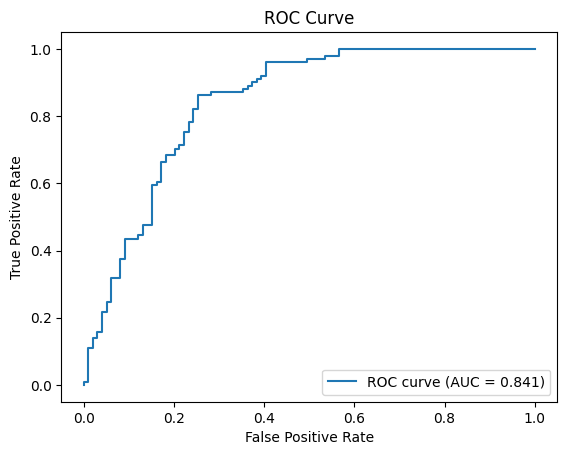

In [159]:
# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.3f})'.format(auc_value))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#### Matriz de Confusión

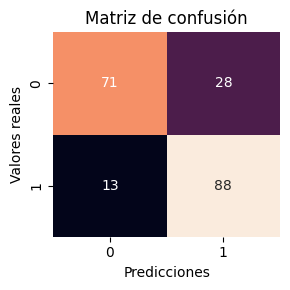

In [164]:
cm = confusion_matrix(y_test, y_pred)

# Dibujaremos esta matriz para hacerla más visual
cm_df = pd.DataFrame(cm)

plt.figure(figsize = (3, 3))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.title('Matriz de confusión')
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')

plt.tight_layout()

plt.show()

In [165]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.76      0.87      0.81       101

    accuracy                           0.80       200
   macro avg       0.80      0.79      0.79       200
weighted avg       0.80      0.80      0.79       200



#### Otras métricas de rendimiento del modelo

Gap de Presicion: 0.06
Coeficiente de sobreajuste: 0.074
Ratio de Sobreajuste: 0.08


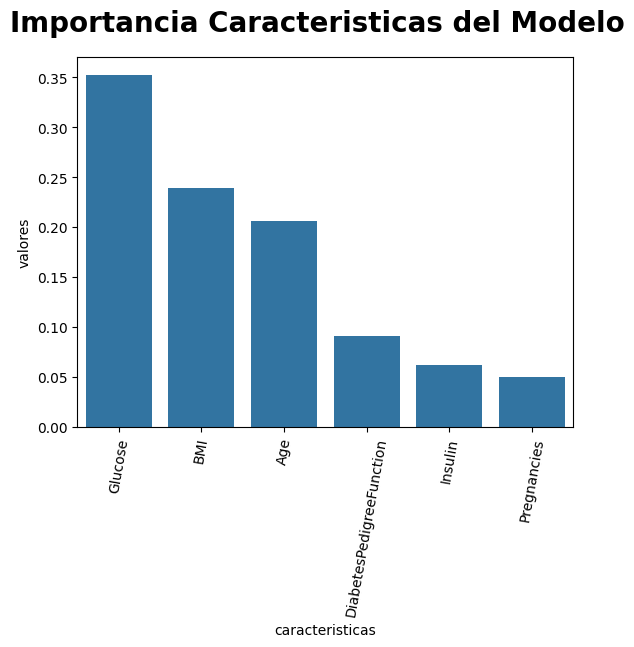

            caracteristicas   valores
1                   Glucose  0.352573
3                       BMI  0.238845
5                       Age  0.206604
4  DiabetesPedigreeFunction  0.090900
2                   Insulin  0.061419
0               Pregnancies  0.049659


In [162]:
# Predicciones en entrenamiento
y_pred_train = model.predict(X_train)

# Precisión en entrenamiento
precision_train = accuracy_score(y_train, y_pred_train)

# Predicciones en evaluación
y_pred_test = model.predict(X_test)

# Precisión en evaluación
precision_test = accuracy_score(y_test, y_pred_test)

# Gap de precisión
gap_precision = precision_train - precision_test
print('Gap de Presicion:',round(gap_precision,2))

#Coeficiente de sobreajuste
#Coeficiente de sobreajuste = (Precisión en entrenamiento - Precisión en evaluación) / Precisión en entrenamiento
#Un coeficiente cercano a 1 indica sobreajuste severo.

coeficiente_sobreajuste = gap_precision / precision_train
print('Coeficiente de sobreajuste:',round(coeficiente_sobreajuste,3))

# Ratio de sobreajuste
ratio_sobreajuste = (precision_train / precision_test) - 1
print('Ratio de Sobreajuste:',round(ratio_sobreajuste,2))


# Importancia de las características
imp_car = model.feature_importances_
df = (pd.DataFrame({"caracteristicas": X_train.columns,
                        "valores": imp_car})
          .sort_values("valores", ascending=False))
sns.barplot(x = 'caracteristicas',y = 'valores',data = df, legend=False)
plt.suptitle('Importancia Caracteristicas del Modelo' , fontweight = 'black', fontsize=20)
plt.xticks(rotation=80);
plt.show()
print(df)


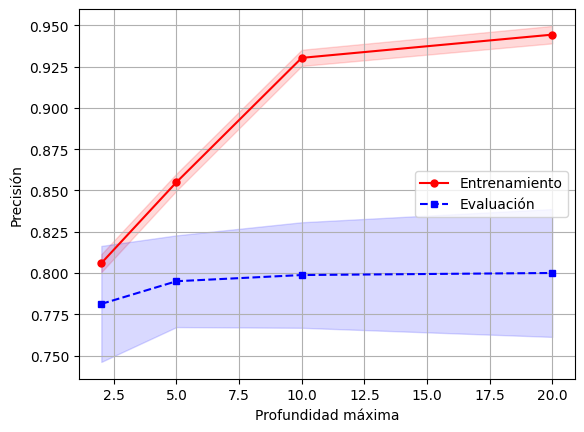

In [163]:
from sklearn.model_selection import validation_curve
# Definimos la lista de profundidades máximas para el árbol de decisión
max_deep_list = [2, 5, 10, 20]

# Calculamos la curva de aprendizaje
train_prec, eval_prec = validation_curve(estimator=model, X=X_train, 
                                         y=y_train, param_name='max_depth', 
                                         param_range=max_deep_list, cv=5)

# Calculamos la media y desviación estándar de la precisión para cada profundidad
train_mean = np.mean(train_prec, axis=1)
train_std = np.std(train_prec, axis=1)
test_mean = np.mean(eval_prec, axis=1)
test_std = np.std(eval_prec, axis=1)

# Graficamos la curva de aprendizaje
plt.plot(max_deep_list, train_mean, color='r', marker='o', markersize=5, 
         label='Entrenamiento')
plt.fill_between(max_deep_list, train_mean + train_std, 
                 train_mean - train_std, alpha=0.15, color='r')
plt.plot(max_deep_list, test_mean, color='b', linestyle='--', 
         marker='s', markersize=5, label='Evaluación')
plt.fill_between(max_deep_list, test_mean + test_std, 
                 test_mean - test_std, alpha=0.15, color='b')
plt.grid()
plt.legend(loc='center right')
plt.xlabel('Profundidad máxima')
plt.ylabel('Precisión')
plt.show()

### Conclusiones

- Entre las primeras observaciones importantes es que el modelo Random Forest me ayudo a incrementar el accuracy que habia obtenido con el modelo de Decsion Tree, pasando de 0.745 (encontrado con el RandomizeSearchCV) a 0.795 obtenido con los parametros por defecto, más ajustes en la profundidad (max_depth=5) y en el numero minimo de muestras para dividir los nodos internos (min_samples_split=10), con el objeto de controlar el sobreajuste con los datos de entrenamiento, lo que me ayudo a mejorar el coeficiente de sobreajuste de 0.23 a 0.07, obteniendo un mejor comportamiento con los datos de evaluación o prueba.

- La curva de evaluación no presenta una caída como la observada con profundidades entre los valores de 5 y 20.

- La accuracy global es de 0.795, lo que indica que el modelo clasifica correctamente casi el 80% de las muestras.

- El F1-score es una métrica que combina la precisión y el recall. En este caso, el F1-score es cercano a 0.8 para ambas clases, lo que indica que el modelo tiene un buen equilibrio entre precisión y recall.

- El gap de precisión es de 0.06, lo que indica que la precisión para la clase 0 es 6% mayor que la precisión para la clase 1. Esto sugiere que el modelo es ligeramente más confiable para la clase 0.

- Debo trabajar un poco más sobre el gap de precisión para mejorar el modelo.